In [1]:
# import libraries
import pandas as pd
import numpy as np

# import for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import for t-test
from scipy import stats

In [2]:
# read a target data
data = pd.read_csv('train_data.csv')

In [9]:
# independent variable 'is_weekend', 'days_of_week', and 'times_of_day'
weekend = np.array(data['is_weekend'])
daysOfWeek = np.array(data['day_of_week'])

# encode 'times_of_day' into numerical order
times = data["times_of_day"].unique()
time_mapping = {'Morning': 1, 'Noon': 2, 'Evening': 3}
times_encoded = data['times_of_day'].map(time_mapping)
data['times_encoded']=times_encoded

# dependent variable 'click_rate'
click_rate = data['click_rate']

In [10]:
data['times_encoded']

0       2
1       1
2       2
3       3
4       2
       ..
1883    2
1884    3
1885    3
1886    3
1887    3
Name: times_encoded, Length: 1888, dtype: int64

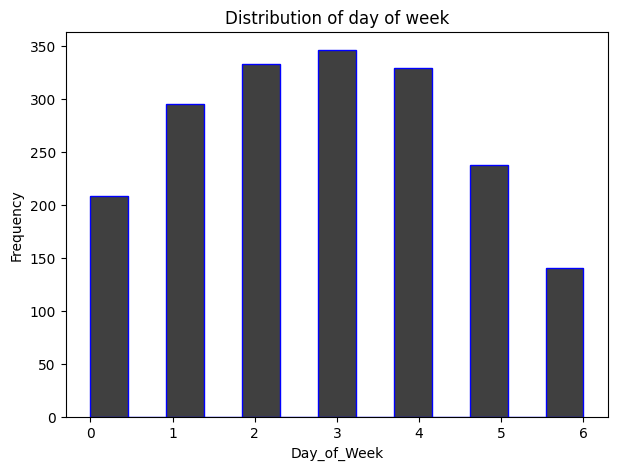

In [ ]:
# Visualize each data

# visualize day_of_week in histogram
plt.figure(figsize=(7, 5))
sns.histplot(x='day_of_week', data=data, bins='auto', kde=False, color='black', edgecolor='blue')

plt.xlabel('Day_of_Week')
plt.ylabel('Frequency')
plt.title('Distribution of day of week')
plt.show()

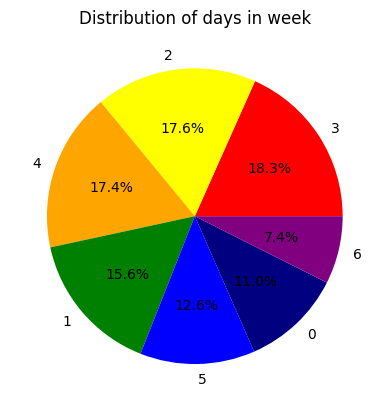

In [ ]:
# count each element
value_counts = data['day_of_week'].value_counts()
# count total
total_count = len(data['day_of_week'])

# visualize day_of_week in pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['red', 'yellow', 'orange', 'green', 'blue', 'navy', 'purple'])
plt.title('Distribution of days in week')
plt.show()

<ipython-input-23-6fb6c6f6e657>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day_of_week', y='click_rate', data=data, ci=None)


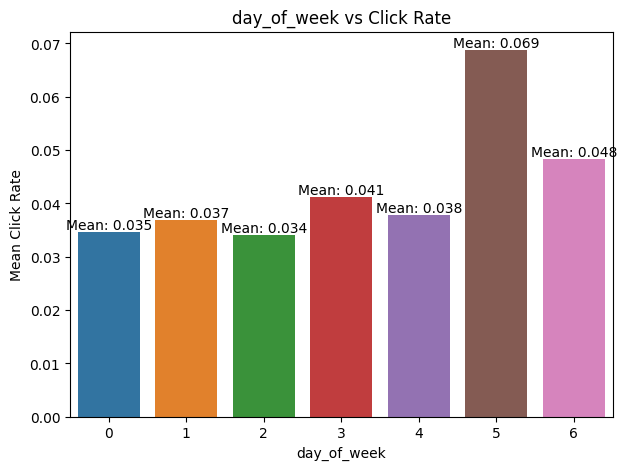

In [ ]:
# Bar plot for 'day_of_week' vs 'click_rate'
plt.figure(figsize=(7, 5))
sns.barplot(x='day_of_week', y='click_rate', data=data, ci=None)
mean_click_rate_image = data.groupby('day_of_week')['click_rate'].mean()
for i, mean_rate in enumerate(mean_click_rate_image):
    plt.text(i, mean_rate, f'Mean: {mean_rate:.3f}', ha='center', va='bottom')
plt.title('day_of_week vs Click Rate')
plt.xlabel('day_of_week')
plt.ylabel('Mean Click Rate')
plt.show()

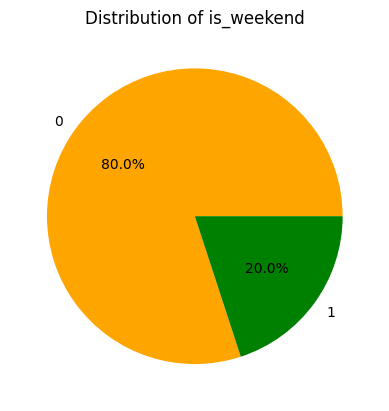

In [ ]:
# count each element
value_counts = data['is_weekend'].value_counts()
# count total
total_count = len(data['is_weekend'])

# visualize 'is_weekend' in pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['orange', 'green'])
plt.title('Distribution of is_weekend')
plt.show()

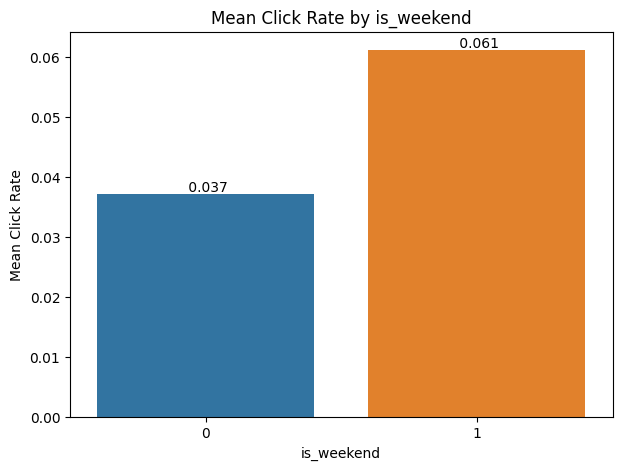

In [ ]:
# Visualize 'is_weekend' vs 'click_rate'
plt.figure(figsize=(7, 5))
sns.barplot(x='is_weekend', y='click_rate', data=data, errorbar=None)
mean_click_rate_urgency = data.groupby('is_weekend')['click_rate'].mean()
for i, mean_rate in enumerate(mean_click_rate_urgency):
    plt.text(i, mean_rate, f' {mean_rate:.3f}', ha='center', va='bottom')
plt.title('is_weekend vs Click Rate')
plt.title('Mean Click Rate by is_weekend')
plt.xlabel('is_weekend')
plt.ylabel('Mean Click Rate')

plt.show()

In [ ]:
# check every kinds of element in 'times_of_day' column
unique_elements = data['times_of_day'].unique()
unique_elements

array(['Noon', 'Morning', 'Evening'], dtype=object)

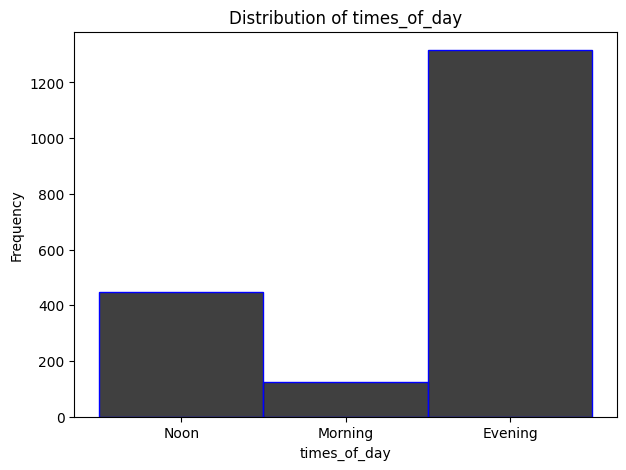

In [ ]:
# visualize 'times_of_day' in histogram
plt.figure(figsize=(7, 5))
sns.histplot(x='times_of_day', data=data, bins='auto', kde=False, color='black', edgecolor='blue')

plt.xlabel('times_of_day')
plt.ylabel('Frequency')
plt.title('Distribution of times_of_day')
plt.show()

In [ ]:
# evaluate p-value and t statistic by t-test
# t statistic and p value
weekend_t, weekend_p = stats.ttest_ind(weekend, click_rate)
daysOfWeek_t, daysOfWeek_p = stats.ttest_ind(daysOfWeek, click_rate)
times_t, times_p = stats.ttest_ind(times_encoded, click_rate)

print(f"is_weekend:  t-statistic - {weekend_t}, p-value - {weekend_p}")
print(f"days of week:  t-statistic - {daysOfWeek_t}, p-value - {daysOfWeek_p}")
print(f"times of day:  t-statistic - {times_t}, p-value - {times_p}")

is_weekend:  t-statistic - 16.778433177564494, p-value - 5.413031606085736e-61
days of week:  t-statistic - 68.5907688094779, p-value - 0.0
times of day:  t-statistic - 184.70050705243636, p-value - 0.0


# Multivariate Regression (Comprehensive Data Analysis)

In [5]:
import statsmodels.api as sm

X = data[['target_audience', 'day_of_week']]  # Independent variables
y = data['click_rate']  # Dependent variable

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             click_rate   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.050
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           0.000330
Time:                        01:17:12   Log-Likelihood:                 2001.0
No. Observations:                1888   AIC:                            -3996.
Df Residuals:                    1885   BIC:                            -3979.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.008     

In [11]:
X = data[['target_audience', 'times_encoded']]  # Independent variables

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             click_rate   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     27.47
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           1.73e-12
Time:                        01:24:29   Log-Likelihood:                 2020.1
No. Observations:                1888   AIC:                            -4034.
Df Residuals:                    1885   BIC:                            -4018.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0869      0.011     

In [12]:
X = data[['target_audience', 'subject_len']]  # Independent variables

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             click_rate   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     32.83
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           9.65e-15
Time:                        01:49:18   Log-Likelihood:                 2025.3
No. Observations:                1888   AIC:                            -4045.
Df Residuals:                    1885   BIC:                            -4028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0736      0.010     

In [13]:
X = data[['target_audience', 'no_of_CTA']]  # Independent variables

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             click_rate   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     30.35
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           1.06e-13
Time:                        01:49:30   Log-Likelihood:                 2022.9
No. Observations:                1888   AIC:                            -4040.
Df Residuals:                    1885   BIC:                            -4023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.008     

In [14]:
X = data[['target_audience', 'mean_CTA_len']]  # Independent variables

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             click_rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.350
Date:                Tue, 05 Dec 2023   Prob (F-statistic):             0.0956
Time:                        01:49:53   Log-Likelihood:                 1995.4
No. Observations:                1888   AIC:                            -3985.
Df Residuals:                    1885   BIC:                            -3968.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.009     

In [15]:
X = data[['target_audience', 'is_emoticons']]  # Independent variables

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             click_rate   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     10.24
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           3.77e-05
Time:                        01:50:10   Log-Likelihood:                 2003.2
No. Observations:                1888   AIC:                            -4000.
Df Residuals:                    1885   BIC:                            -3984.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0303      0.008     

In [16]:
X = data[['target_audience', 'is_discount']]  # Independent variables

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             click_rate   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.286
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           0.000261
Time:                        01:50:20   Log-Likelihood:                 2001.3
No. Observations:                1888   AIC:                            -3997.
Df Residuals:                    1885   BIC:                            -3980.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0314      0.008     

In [17]:
X = data[['target_audience', 'is_urgency']]  # Independent variables

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             click_rate   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     14.48
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           5.77e-07
Time:                        01:50:46   Log-Likelihood:                 2007.4
No. Observations:                1888   AIC:                            -4009.
Df Residuals:                    1885   BIC:                            -3992.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0303      0.008     

In [18]:
X = data[['target_audience', 'category']]  # Independent variables

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             click_rate   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     28.46
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           6.62e-13
Time:                        01:51:20   Log-Likelihood:                 2021.1
No. Observations:                1888   AIC:                            -4036.
Df Residuals:                    1885   BIC:                            -4020.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0569      0.009     

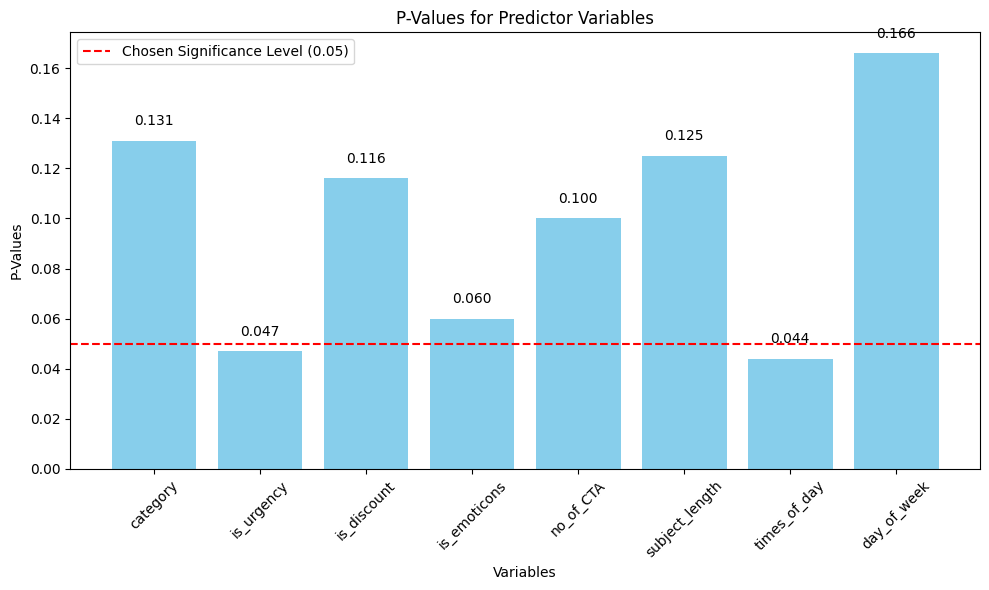

In [19]:
import matplotlib.pyplot as plt

pValues = [0.131, 0.047, 0.116, 0.060, 0.100, 0.125, 0.044, 0.166]
labels = ['category', 'is_urgency', 'is_discount', 'is_emoticons', 'no_of_CTA', 'subject_length', 'times_of_day', 'day_of_week']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, pValues, color='skyblue')
plt.axhline(y=0.05, color='red', linestyle='--', label='Chosen Significance Level (0.05)')

# Adding labels and titles
plt.xlabel('Variables')
plt.ylabel('P-Values')
plt.title('P-Values for Predictor Variables')
plt.xticks(rotation=45)
plt.legend()

# Adding the p-values as text above the bars
for bar, val in zip(bars, pValues):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{val:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
